Aircraft Crashes and Fatalities 1908-2019


In [1]:
import pandas as pd
import psycopg2 as pg
import numpy as np
import sys, argparse, csv
from sklearn.model_selection import train_test_split   
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix
import pylab as py

1. Imported the csv file and got the basic information to see what columns and rows could be used, non-null information, and data type.   

In [314]:
crashes = pd.read_csv(r"C:\Users\chris\anaconda3\cohort_06\daimil10\exams\aircraft_fatlities\data\aircraft_info.csv")
crashes.info()
crashes.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   3457 non-null   object 
 2   Location               4963 non-null   object 
 3   Operator               4957 non-null   object 
 4   Flight #               1315 non-null   object 
 5   Route                  4192 non-null   object 
 6   AC Type                4952 non-null   object 
 7   Registration           4694 non-null   object 
 8   cn/ln                  4299 non-null   object 
 9   Aboard                 4949 non-null   float64
 10  Aboard Passangers      4738 non-null   float64
 11  Aboard Crew            4741 non-null   float64
 12  Fatalities             4959 non-null   float64
 13  Fatalities Passangers  4725 non-null   float64
 14  Fatalities Crew        4726 non-null   float64
 15  Grou

,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4949.000000,4738.000000,4741.000000,4959.000000,4725.000000,4726.000000,4926.000000
mean,31.088301,26.898691,4.479646,22.338173,19.017566,3.579348,1.728177
std,45.438282,44.010591,3.489021,35.026176,34.114849,3.170223,55.708966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000


2. Next, drop all columns not required for this analysis along with all NaN values in the columns kept.

In [312]:
crashes = pd.read_csv(r"C:\Users\chris\anaconda3\cohort_06\daimil10\exams\aircraft_fatlities\data\aircraft_info.csv")
crashes.info()
crashes.describe()

,Date,Time,Location,Operator,Aboard Passangers,Fatalities Passangers
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,1.0,1.0
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,0.0,0.0
10,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,0.0,0.0
49,12/14/1920,12:15,"London, England",Handley Page Transport,6.0,2.0
60,08/24/1921,17:40,"River Humber, England",Military - Royal Airship Works,0.0,0.0
...,...,...,...,...,...,...
4962,04/16/2019,11:00,"Puerto Montt, Chile",Archipelagos Service Aereos,5.0,5.0
4963,05/05/2019,18:30,"Near Monclava, Mexico",TVPX Aircraft Solutions,11.0,11.0
4964,05/05/2019,18:30,"Moscow, Russia",Aeroflot Russian International Airlines,73.0,40.0
4965,06/03/2019,13:00,"Near Lipo, India",Military - Indian Air Force,5.0,5.0


3. The filtered data was next sorted to get the values of the Operator, Time, and Location that shows up more than once in the data.

In [311]:
op = crashed['Operator'].value_counts(sort=[True])
ti = crashed['Time'].value_counts(sort=True)
lo = crashed['Location'].value_counts(sort=True)



4. Based on the results above, the the date was filtered to only show years 2014-2019. Also in the date column the day was dropped becasue that has no added value to this data. Shrinking the data now to 74 rows and 6 columns.

In [319]:
crashed['Date'] = pd.to_datetime(crashed['Date'], dayfirst=False)
crashed['Date'] = crashed['Date'].dt.strftime('%Y-%m')
new_dates= crashed[(crashed['Date'] > '2015-01')]
new_dates

,Date,Time,Location,Operator,Aboard Passangers,Fatalities Passangers
4887,2015-02,10:55,"Taipei, Taiwan",Transasia,53.0,39.0
4889,2015-03,10:53,"Near Digne-Les-Bains, France",Germanwings,144.0,144.0
4890,2015-06,13:43,"Ella Lake, Alaska",Promech Air,8.0,8.0
4891,2015-06,11:48,"Medan, Indonesia",Military - Indonesian Air Force,110.0,110.0
4893,2015-08,08:45,"Ninia, Indonesia",Komala Air,4.0,0.0
...,...,...,...,...,...,...
4962,2019-04,11:00,"Puerto Montt, Chile",Archipelagos Service Aereos,5.0,5.0
4963,2019-05,18:30,"Near Monclava, Mexico",TVPX Aircraft Solutions,11.0,11.0
4964,2019-05,18:30,"Moscow, Russia",Aeroflot Russian International Airlines,73.0,40.0
4965,2019-06,13:00,"Near Lipo, India",Military - Indian Air Force,5.0,5.0


5. Now its time to predict if the original hypothesis is true or not. Aboard and Fatalities Passangers are the data columns used to help predict the Null Hypothesis. It provided inoformation to be used in a line regression model. 

In [276]:
X= new_dates['Aboard Passangers']
y= new_dates['Fatalities Passangers']
X = sm.add_constant(X)
simple_model = sm.OLS(y,X).fit()
simple_predictions = simple_model.predict(X)

print_simple_table = simple_model.summary()
print(print_simple_table)

                              OLS Regression Results                             
Dep. Variable:     Fatalities Passangers   R-squared:                       0.592
Model:                               OLS   Adj. R-squared:                  0.586
Method:                    Least Squares   F-statistic:                     104.3
Date:                   Tue, 14 Nov 2023   Prob (F-statistic):           1.19e-15
Time:                           13:05:23   Log-Likelihood:                -362.76
No. Observations:                     74   AIC:                             729.5
Df Residuals:                         72   BIC:                             734.1
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const   

6. Using that a simple plot highlighting the correlation between fatalities and aboard passasngers.

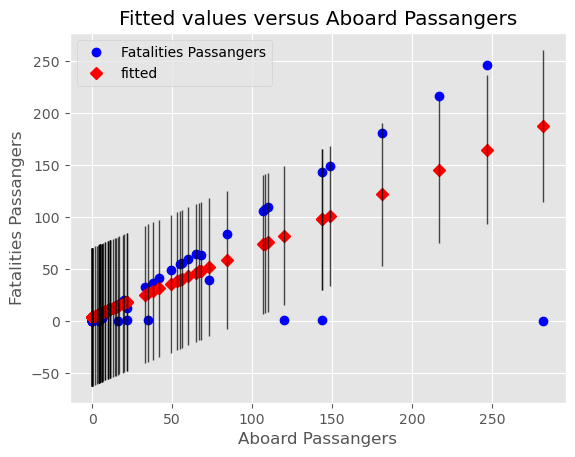

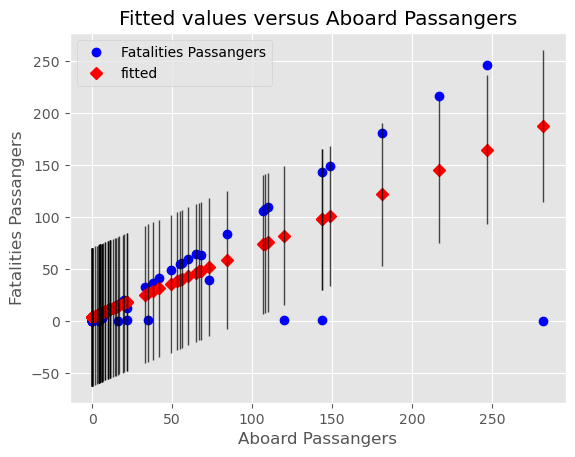

In [277]:
sm.graphics.plot_fit(simple_model,'Aboard Passangers')

7. This code helped highlight the slope and pvalue of the data. Helping strengthen the null hypothesis.

In [303]:
X=new_dates['Aboard Passangers'].values
Y=new_dates['Fatalities Passangers'].values
from scipy.stats import linregress
d = m ,b, *_ = stats.linregress(X,Y)

d

LinregressResult(slope=0.6515922317353936, intercept=4.214594382703925, rvalue=0.7692263688133317, pvalue=1.1930398077224988e-15, stderr=0.06378819014245705, intercept_stderr=4.59590329750537)

Text(0, 0.5, 'Passagngers')

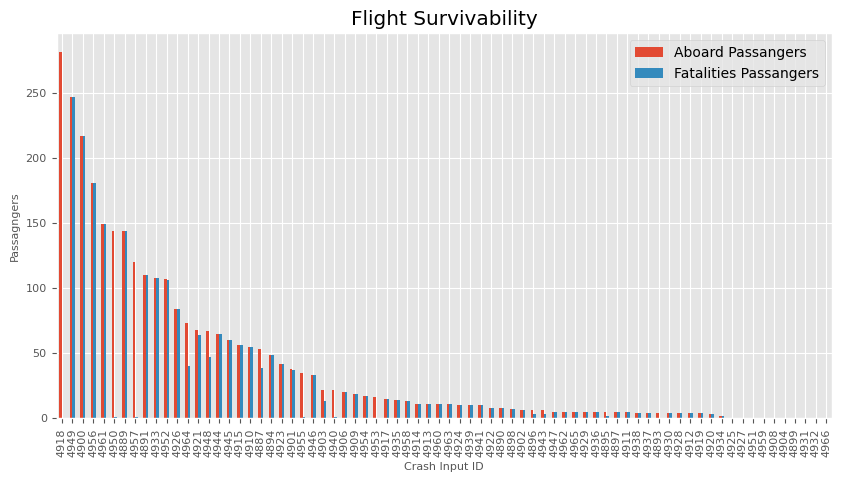

In [270]:
f = new_dates.sort_values(('Aboard Passangers'), axis = 0, ascending = False)
ax = f.plot(kind='bar', title ="Flight Survivability", figsize=(10,5),legend=True, fontsize=8)

ax.set_xlabel("Crash Input ID",fontsize=8)
ax.set_ylabel("Passagngers",fontsize=8)